<a href="https://colab.research.google.com/github/Benjamin25-11/Tareas/blob/main/Tarea_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

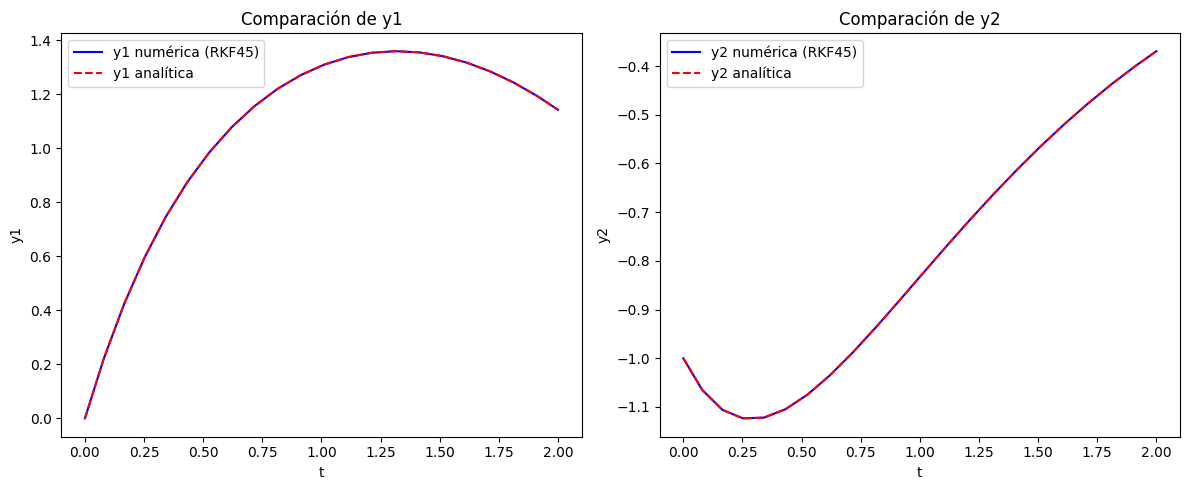

Evaluaciones de la función: 132


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Sistema de ecuaciones
def sistema(t, y):
    y1, y2 = y
    dy1_dt = -4 * y1 - 2 * y2 + np.cos(t) + 4 * np.sin(t)
    dy2_dt = 3 * y1 + y2 - 3 * np.sin(t)
    return np.array([dy1_dt, dy2_dt])

class MinStep(Exception):
    pass

def rkf(f, a, b, yo, tol, hmin, hmax):
    t = a
    w = yo
    h = hmax
    flag = 1
    evaluaciones = 0

    ts = [t]
    sol = [w]
    hs = []
    rs = []

    while flag:
        # Evaluaciones de la función
        k1 = h * f(t, w)
        k2 = h * f(t + h / 4, w + k1 / 4)
        k3 = h * f(t + 3 * h / 8, w + 3 * k1 / 32 + 9 * k2 / 32)
        k4 = h * f(t + 12 * h / 13, w + 1932 * k1 / 2197 - 7200 * k2 / 2197 + 7296 * k3 / 2197)
        k5 = h * f(t + h, w + 439 * k1 / 216 - 8 * k2 + 3680 * k3 / 513 - 845 * k4 / 4104)
        k6 = h * f(t + h / 2, w - 8 * k1 / 27 + 2 * k2 - 3544 * k3 / 2565 + 1859 * k4 / 4104 - 11 * k5 / 40)
        evaluaciones += 6

        # Estima del error
        R = np.linalg.norm(k1 / 360 - 128 * k3 / 4275 - 2197 * k4 / 75240 + k5 / 50 + 2 * k6 / 55)

        if R <= tol:
            t += h
            w = w + 25 * k1 / 216 + 1408 * k3 / 2565 + 2197 * k4 / 4104 - k5 / 5
            ts.append(t)
            sol.append(w)
            hs.append(h)
            rs.append(R)

        # Actualización de h
        q = 0.84 * (tol / R)**(1 / 4)
        if q <= 0.1:
            h = 0.1 * h
        elif q >= 4:
            h = 4 * h
        else:
            h = q * h
        if h > hmax:
            h = hmax

        # Condiciones de finalización
        if t >= b:
            flag = 0
        elif t + h > b:
            h = b - t
        elif h < hmin:
            raise MinStep("Se excedió el paso mínimo.")

    return np.array(ts), np.array(sol), np.array(hs), np.array(rs), evaluaciones

# Condiciones iniciales y parámetros
a, b = 0, 2
yo = [0, -1]
tol = 1e-6
hmin, hmax = 0.001, 0.1


ts, sol, hs, rs, evaluaciones = rkf(sistema, a, b, yo, tol, hmin, hmax)

# Solución analítica
def solucion_analitica(t):
    u1 = 2 * np.exp(-t) - 2 * np.exp(-2 * t) + np.sin(t)
    u2 = -3 * np.exp(-t) + 2 * np.exp(-2 * t)
    return u1, u2

# Evaluación de la solución analítica
u1_analitica, u2_analitica = solucion_analitica(ts)

# Gráficas de las soluciones numéricas vs. analíticas
sol = np.array(sol).T
plt.figure(figsize=(12, 5))

# Gráfica para y1
plt.subplot(1, 2, 1)
plt.plot(ts, sol[0], 'b-', label='y1 numérica (RKF45)')
plt.plot(ts, u1_analitica, 'r--', label='y1 analítica')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.title('Comparación de y1')

# Gráfica para y2
plt.subplot(1, 2, 2)
plt.plot(ts, sol[1], 'b-', label='y2 numérica (RKF45)')
plt.plot(ts, u2_analitica, 'r--', label='y2 analítica')
plt.xlabel('t')
plt.ylabel('y2')
plt.legend()
plt.title('Comparación de y2')

plt.tight_layout()
plt.show()

print(f"Evaluaciones de la función: {evaluaciones}")
